# Biostat M280 Homework 3

Cameron S. Goldbeck

**Due May 19 @ 11:59PM**

In this assignment, we are going to try different numerical methods learnt in class on the [Google PageRank problem](https://en.wikipedia.org/wiki/PageRank).

Self looping? NO right?

## Q1

Let $\mathbf{A} \in \{0,1\}^{n \times n}$ be the connectivity matrix of $n$ web pages with entries
$$
\begin{eqnarray*}
	a_{ij}= \begin{cases}
	1 & \text{if page $i$ links to page $j$} \\
	0 & \text{otherwise}
	\end{cases}.
\end{eqnarray*}
$$
$r_i = \sum_j a_{ij}$ is the out-degree of page $i$. That is $r_i$ is the number of links on page $i$. Imagine a random surfer exploring the space of $n$ pages according to the following rules.  

- From a page $i$ with $r_i>0$
    * with probability $p$, (s)he randomly chooses a link on page $i$ (uniformly) and follows that link to the next page  
    * with probability $1-p$, (s)he randomly chooses one page from the set of all $n$ pages (uniformly) and proceeds to that page  
- From a page $i$ with $r_i=0$ (a dangling page), (s)he randomly chooses one page from the set of all $n$ pages (uniformly) and proceeds to that page  
    
The process defines a Markov chain on the space of $n$ pages. Write down the transition matrix $\mathbf{P}$ of the Markov chain in matrix/vector notation.

1)
For every entry, $P_{ij}$ where $A_{ij}=1$, because there exist edges, given probability $p$, the entry is

$$P_{ij}=\frac{p}{r_i}+\frac{1-p}{n}$$

Where the first term represents uniformly choosing one of the $r_i$ edges, and the second term is choosing one of the $n$ pages. Then given a $A_{ij}=0$ but $r_i\ne0$, this corresponds to a non-linked page on a non-dangling node, the entry is simply

$$p_{ij}=\begin{cases}
\frac{p}{r_i}+\frac{1-p}{n} & A_{ij}=1\\
\frac{1-p}{n} & A_{ij}=0, r_i\ne0\\
\frac{1}{n} & \text{else}
\end{cases}$$

No we define matrix $\textbf{W}\in\mathbb{R}^{n\times n}$ which is diagonal and

$$w_{ii}=\begin{cases}
\tfrac{1}{r_i} & \text{if } r_i\ne 0\\
0 & \text{if } r_i=0\end{cases}$$

Now let $\textbf{u}\in\mathbb{R}^{n\times 1}$ and

$$u_i=\begin{cases}
\tfrac{1}{n} & \text{if } r_i=0\\
\tfrac{1-p}{n} & \text{if } r_i\ne 0
\end{cases}$$

Then we can write $\textbf{P}$ as 

$$\textbf{P}=p\textbf{WA}+\textbf{u}\textbf{1}_n^T$$

## Q2

According to standard Markov chain theory, the (random) position of the surfer converges to the stationary distribution $\mathbf{x} = (x_1,\ldots,x_n)^T$ of the Markov chain. $x_i$ has the natural interpretation of the proportion of times the surfer visits page $i$ in the long run. Therefore $\mathbf{x}$ serves as page ranks: a higher $x_i$ means page $i$ is more visited. It is well-known that $\mathbf{x}$ is the left eigenvector corresponding to the top eigenvalue 1 of the transition matrix $\mathbf{P}$. That is $\mathbf{P}^T \mathbf{x} = \mathbf{x}$. Therefore $\mathbf{x}$ can be solved as an eigen-problem. Show that it can also be cast as solving a linear system. Remember $\mathbf{x}$ is a distribution so we normalize it to have $\sum_{i=1}^n x_i = 1$.

2) We want to find $\textbf{x}$, where $\textbf{P}^T\textbf{x}=\textbf{x}$. This corresponds to the eigenvector of $P\textbf{P}^T$ corresponding to eigenvalue $\lambda=1$. We then have

$$\textbf{P}^T\textbf{x}=\textbf{x} \implies (\textbf{I}-\textbf{P}^T)\textbf{x}=0$$

We note this matrix $\textbf{I}-\textbf{P}^T$ is not full rank, as the null space contains more than $\textbf{0}$. Therefore, we can replace the first row of this matrix with ones, and since $\sum x_i=1$, we know the right hand side solutions will be $\textbf{b}=(1,0,\ldots,0)^T$. Therefore, where $(\textbf{I}-\textbf{P}^T)^*$ indicates the augmented matrix with the first row replaced with ones, we can solve for $\textbf{x}$ by solving the following system. 

$$(\textbf{I}-\textbf{P}^T)^*\textbf{x}=\textbf{b}$$

## Q3

Download the `ucla.zip` package from course webpage. Unzip the package, which contains two files `U.txt` and `A.txt`. `U.txt` lists the 500 URL names. `A.txt` is the $500 \times 500$ connectivity matrix. Read data into Julia. Compute summary statistics:
* number of pages
* number of edges
* number of dangling nodes (pages with no out links)
* which page has max in-degree?
* which page has max out-degree?
* visualize the sparsity pattern of $\mathbf{A}$

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10706  100 10706    0     0   406k      0 --:--:-- --:--:-- --:--:--  418k


The number of pages is 500 
The number of edges is 10853.0 
The number of dangling nodes is 103 
U[maxIn] = 

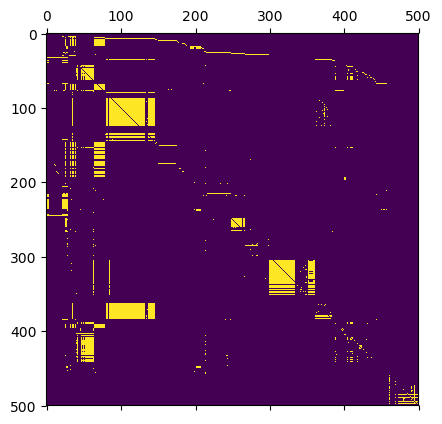

Any["http://www.ucla.edu"]
U[maxOut] = Any["http://giveto.ucla.edu","http://giveto.ucla.edu/fund/division-of-digestive-diseases","http://giveto.ucla.edu/fund/ucla-college-of-letters-and-sciences-physiological-science","http://giveto.ucla.edu/fund/college-history","http://giveto.ucla.edu/fund/world-arts-and-cultures-dance","http://giveto.ucla.edu/fund/henry-samueli-school-of-engineering-and-applied-science-bioengineering"]


In [1]:
download("http://hua-zhou.github.io/teaching/biostatm280-2017spring/hw/ucla.zip");

#Read in the matrix A and remove diagonal elements
A = sparse(readdlm("A.txt", ',') - Diagonal(readdlm("A.txt", ',')));

U = readdlm("U.txt", '\n');

pages = size(A, 1);

edges = sum(A);

dangling = pages - countnz(sum(A, 2));

#Finds the maximum in value and checks for duplicates
maxIn = find(x -> x == maximum(sum(A, 1)), sum(A, 1));

#Finds the maximum out value and checks for duplicates
maxOut = find(x -> x == maximum(sum(A, 2)), sum(A, 2));


print("The number of pages is $pages \n")

print("The number of edges is $edges \n")

print("The number of dangling nodes is $dangling \n")

using PyPlot

matshow(A);

@show U[maxIn]
@show U[maxOut];

## Q4

Set the _teleportation_ parameter at $p = 0.85$. Try the following methods to solve for $\mathbf{x}$ using the `ucla.zip` data.

0. A dense linear system solver such as LU decomposition.  
0. A simple iterative linear system solver such as Jacobi or Gauss-Seidel.  
0. A dense eigen-solver.  
0. A simple iterative eigen-solver such as the power method.

In [2]:
using WoodburyMatrices, BenchmarkTools 

#To start, we will Creat I-P' as a full matrix and as a Woodbury Matrix
#We form it as I-P' =  I-pA'W+CUt, where (I-pA'W) has ones in the first row,
#and C is a negative ones vector with a zero in the first entry

n = size(A, 1)

r = sum(A, 2)

W = zeros(n, n)

Ut = zeros(1, n)

C =  -ones(n, 1)

C[1] = 0

p = .85

b = ones(n, 1) + C

#Forming the matrices for P=pWA+U1 as documented in Q1
for i in 1:n
    if r[i] != 0
        W[i, i] = 1 / r[i]
        Ut[i] =  (1 - p) / n
    end
    if r[i] == 0
        Ut[i] = 1 / n
    end
end

B = sparse(I - p * (A' * W))

B[1,:] = ones(1, n)

Tfull = B + C * Ut

T = Woodbury(B, C, 1, Ut);

In [3]:
#1) LU factorization

#this will be a vector containg solution x and its index
s1 = zeros(n, 2)

#indexing
for i in 1:n
    s1[i, 2] = i
end

@benchmark s1[:, 1] = lufact(Tfull) \ b

BenchmarkTools.Trial: 
  memory estimate:  1.92 MiB
  allocs estimate:  8
  --------------
  minimum time:     3.398 ms (0.00% GC)
  median time:      4.133 ms (0.00% GC)
  mean time:        4.295 ms (3.00% GC)
  maximum time:     12.698 ms (0.00% GC)
  --------------
  samples:          1156
  evals/sample:     1

In [5]:
#2) Jacobi method
P = p * W * A - Ut' * C'
D = Diagonal(I - P')

#Create a function to run Jacobi for benchmarking purposes
function run1(D, T)
    maxIter=5000
    count = 0
    srand(1234)
    xold = rand(n,1)
    for i in 1:maxIter
        xnew = - D \ (T * xold) + xold + D \ b
        #Making xnew sum to 1 quickens convergence
        xnew = xnew / sum(xnew)
        tol = norm(xnew - xold)
        if tol < .00000001
           break
        end
        count += 1
        xold = xnew 
    end
    return xold
end

@benchmark run1(D, T)

BenchmarkTools.Trial: 
  memory estimate:  31.13 MiB
  allocs estimate:  28491
  --------------
  minimum time:     23.029 ms (8.74% GC)
  median time:      26.291 ms (10.93% GC)
  mean time:        26.319 ms (13.19% GC)
  maximum time:     32.914 ms (17.77% GC)
  --------------
  samples:          190
  evals/sample:     1

In [6]:
#this will be a vector containg solution x and its index
s2 = zeros(n, 2)

s2[:, 1] = run1(D, T)

#indexing
for i in 1:n
    s2[i, 2] = i
end

In [7]:
#3) Dense Eigen solver using eigvecs
Pt= p * (A' * W) + ones(n,1) * Ut

#this will be a vector containg solution x and its index
s3 = zeros(n, 2)

#indexing
for i in 1:n
    s3[i, 2] = i
end

@benchmark s3[:, 1] = real(eigvecs(Pt)[:,1])/ sum(real(eigvecs(Pt)[:,1]))

BenchmarkTools.Trial: 
  memory estimate:  15.63 MiB
  allocs estimate:  522
  --------------
  minimum time:     592.143 ms (0.00% GC)
  median time:      609.189 ms (0.25% GC)
  mean time:        610.476 ms (0.19% GC)
  maximum time:     634.134 ms (0.00% GC)
  --------------
  samples:          9
  evals/sample:     1

In [9]:
#4) Power method

P1 = sparse(p * A' * W)
#Create a function to benchmark
function run2(P1, Ut)
    maxIter=5000
    count = 0
    srand(1234)
    xold = rand(n,1)
    for i in 1:maxIter
        xnew = (P1 * xold .+ (Ut * xold)[1])
        xnew = xnew / norm(xnew)
        xnew = xnew / sum(xnew)
        tol = norm(xnew - xold)
        if tol < .00000001
           break
        end
        count += 1
        xold = xnew 
    end
    return xold
end

@benchmark run2(P1, Ut)

BenchmarkTools.Trial: 
  memory estimate:  618.13 KiB
  allocs estimate:  301
  --------------
  minimum time:     508.900 μs (0.00% GC)
  median time:      646.346 μs (0.00% GC)
  mean time:        773.772 μs (10.49% GC)
  maximum time:     4.444 ms (73.46% GC)
  --------------
  samples:          6394
  evals/sample:     1

In [10]:
#this will be a vector containg solution x and its index
s4 = zeros(n, 2)

#indexing
s4[:, 1] = run2(P1, Ut)

for i in 1:n
    s4[i, 2] = i
end

In [11]:
using DataFrames
ptable = DataFrame(LUpr =  s1[:, 1], LUsite = U[Int64.(s1[:, 2])],
                    JACOBIpr =  s2[:, 1], JACOBIsite = U[Int64.(s2[:, 2])],
                    EIGVECpr =  s3[:, 1], EIGVECsite = U[Int64.(s3[:, 2])],
                    POWERpr =  s4[:, 1], POWERsite = U[Int64.(s4[:, 2])]
)
#We can see that each method is returning the same results, i.e. they are
#performing with the same accuracy.

,LUpr,LUsite,JACOBIpr,JACOBIsite,EIGVECpr,EIGVECsite,POWERpr,POWERsite
1,0.01277006557515328,http://www.ucla.edu,0.012770837415344538,http://www.ucla.edu,0.012770065575153184,http://www.ucla.edu,0.012770068448867841,http://www.ucla.edu
2,0.001303929766823507,http://4393665.fls.doubleclick.net/activityi;src=4393665;type=Prima0;cat=UCLAe0;ord=,0.0013039523019233625,http://4393665.fls.doubleclick.net/activityi;src=4393665;type=Prima0;cat=UCLAe0;ord=,0.0013039297668235121,http://4393665.fls.doubleclick.net/activityi;src=4393665;type=Prima0;cat=UCLAe0;ord=,0.0013039299538898004,http://4393665.fls.doubleclick.net/activityi;src=4393665;type=Prima0;cat=UCLAe0;ord=
3,0.004054048198030557,http://www.atmos.ucla.edu/weather/quick-look,0.004054068803487586,http://www.atmos.ucla.edu/weather/quick-look,0.004054048198030577,http://www.atmos.ucla.edu/weather/quick-look,0.004054048894827191,http://www.atmos.ucla.edu/weather/quick-look
4,0.00398337716236042,http://bit.ly/10Wf0Te,0.003983397909103523,http://bit.ly/10Wf0Te,0.003983377162360447,http://bit.ly/10Wf0Te,0.003983377828150465,http://bit.ly/10Wf0Te
5,0.0013039297668235126,http://bit.ly/1NMd3KF,0.0013039523019233625,http://bit.ly/1NMd3KF,0.0013039297668235156,http://bit.ly/1NMd3KF,0.0013039299538898004,http://bit.ly/1NMd3KF
6,0.001303929766823522,http://bit.ly/1JTGEHi,0.0013039523019233625,http://bit.ly/1JTGEHi,0.0013039297668235156,http://bit.ly/1JTGEHi,0.0013039299538898004,http://bit.ly/1JTGEHi
7,0.0013039297668235106,http://bit.ly/1JTGEHj,0.0013039523019233625,http://bit.ly/1JTGEHj,0.0013039297668235145,http://bit.ly/1JTGEHj,0.0013039299538898004,http://bit.ly/1JTGEHj
8,0.0013039297668235026,http://bit.ly/1JTGEHk,0.0013039523019233625,http://bit.ly/1JTGEHk,0.001303929766823515,http://bit.ly/1JTGEHk,0.0013039299538898004,http://bit.ly/1JTGEHk
9,0.0013039297668235082,http://bit.ly/1TooUWd,0.0013039523019233625,http://bit.ly/1TooUWd,0.001303929766823515,http://bit.ly/1TooUWd,0.0013039299538898004,http://bit.ly/1TooUWd
10,0.001303929766823504,http://bit.ly/1Sm3c4v,0.0013039523019233625,http://bit.ly/1Sm3c4v,0.001303929766823515,http://bit.ly/1Sm3c4v,0.0013039299538898004,http://bit.ly/1Sm3c4v


## Q5

List the top 20 ranked URLs you found.

In [62]:
#Top results, up to 30.
#Note: With fewer decimals it looks like there are ties, however,
#if we expand to further decimal places, this is no longer true
#therefore, we do not have to deal with ties for the top 20.
s11 = sortrows(s1, rev = true)[1:20, :]
s22 = sortrows(s2, rev = true)[1:20, :]
s33 = sortrows(s3, rev = true)[1:20, :]
s44 = sortrows(s4, rev = true)[1:20, :]
ptable2 = DataFrame(LUpr =  s11[:, 1], LUsite = U[Int64.(s11[:, 2])],
                    JACOBIpr =  s22[:, 1], JACOBIsite = U[Int64.(s22[:, 2])],
                    EIGVECpr =  s33[:, 1], EIGVECsite = U[Int64.(s33[:, 2])],
                    POWERpr =  s44[:, 1], POWERsite = U[Int64.(s44[:, 2])]
)

,LUpr,LUsite,JACOBIpr,JACOBIsite,EIGVECpr,EIGVECsite,POWERpr,POWERsite
1,0.02287845485399755,http://schema.org,0.022878394083039846,http://schema.org,0.02287845485399757,http://schema.org,0.022878458686165896,http://schema.org
2,0.019352947732631187,http://www,0.019352906154543423,http://www,0.019352947732631146,http://www,0.01935294423433094,http://www
3,0.01277006557515328,http://www.ucla.edu,0.012770837415344538,http://www.ucla.edu,0.012770065575153184,http://www.ucla.edu,0.012770068448867841,http://www.ucla.edu
4,0.011525276208927427,http://www.directory.ucla.edu,0.011525298555993364,http://www.directory.ucla.edu,0.011525276208927428,http://www.directory.ucla.edu,0.011525278866127328,http://www.directory.ucla.edu
5,0.010731106258308221,http://www.universityofcalifornia.edu,0.01073112090238587,http://www.universityofcalifornia.edu,0.010731106258308238,http://www.universityofcalifornia.edu,0.010731108610300038,http://www.universityofcalifornia.edu
6,0.00849350389536066,http://schema.org/CreativeWork,0.008493481726491076,http://schema.org/CreativeWork,0.008493503895360672,http://schema.org/CreativeWork,0.008493505291566079,http://schema.org/CreativeWork
7,0.008101744269254895,http://schema.org/Text,0.008101724780389029,http://schema.org/Text,0.008101744269254899,http://schema.org/Text,0.008101745417962684,http://schema.org/Text
8,0.00796066482304678,http://giveto.ucla.edu,0.007960661521957513,http://giveto.ucla.edu,0.007960664823046767,http://giveto.ucla.edu,0.007960666356824115,http://giveto.ucla.edu
9,0.007544567463278093,http://www.registrar.ucla.edu/calendar,0.007544587926938122,http://www.registrar.ucla.edu/calendar,0.007544567463278091,http://www.registrar.ucla.edu/calendar,0.007544569643938639,http://www.registrar.ucla.edu/calendar
10,0.006768689644398421,http://www.uclalumni.net,0.006768668425424306,http://www.uclalumni.net,0.0067686896443984014,http://www.uclalumni.net,0.006768684067439472,http://www.uclalumni.net


## Q6

As of Monday May 2 2017, there are at least 4.49 billion indexed webpages on internet according to <http://www.worldwidewebsize.com/>. Explain whether each of these methods works for the PageRank problem at this scale.

6) At this level, and noting that we have a sparse matrix structure, the power method is the best candadit for solving this problem. From class we have the LU decomposition is $O(n^3)$, the Jacobi method $O(n\ln(n))$, eigvec $O(n^3)$, and power method $O(n)$. This is clear that on such a large scale, with a clear structure, using Power method for eigenvector will perform the best. Our results support this. LU factorization took about $4.3$ms, Jacobi $26$ms, Eigvec $610$ms, and power $773 \mu$s. Furthermore, slow performance by LU factorization and Eigvec makes sense, because they do not take advantage of the sparse structure; they are for dense matrices. It is possible that Jacobi method could be improved by utilizing a sparse structure instead of a Woodbury structure, as we did in the Power Method Implimitation. 